## Homework

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices) or download using wget link mentioned below:

```
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```
> Note: sometimes your answer doesn't match one of the options exactly. That's fine.
Select the option that's closest to your solution.


## Loading the data

Use only the following columns:
* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`

And:
* Fill NAs with 0.
* Apply the log tranform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer` to turn the dataframe into matrices.

In [50]:
!wget -P data -nc https: // raw.githubusercontent.com / alexeygrigorev / datasets / master / housing.csv

File ‘data/housing.csv’ already there; not retrieving.



In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from tqdm.auto import tqdm

from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [52]:
data_file = 'data/housing.csv'
df = pd.read_csv(data_file)
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [53]:
df.fillna(0, inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [54]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

for c in ['median_house_value']:
    del df_train[c]
    del df_val[c]
    del df_test[c]

In [55]:
(len(df_train), len(df_val), len(df_test))

(12384, 4128, 4128)

In [60]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train[:6]

array([[ 5.7800e+02,  1.9000e+01,  3.4630e+01, -1.1818e+02,  4.1573e+00,
         0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         1.6770e+03,  6.0600e+02,  3.5620e+03],
       [ 5.0000e+01,  1.0000e+01,  3.4690e+01, -1.1690e+02,  4.9990e-01,
         0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         1.0800e+02,  1.0200e+02,  3.3700e+02],
       [ 4.6200e+02,  2.7000e+01,  3.3780e+01, -1.1826e+02,  2.0458e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
         1.7230e+03,  4.9100e+02,  1.6720e+03],
       [ 1.0560e+03,  5.0000e+00,  3.4170e+01, -1.1733e+02,  2.9877e+00,
         0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         2.5640e+03,  1.1400e+03,  4.7180e+03],
       [ 2.7200e+02,  4.2000e+01,  3.5350e+01, -1.1902e+02,  1.9830e+00,
         0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         7.7600e+02,  2.5100e+02,  1.2390e+03],
       [ 1.0000e+03,  1.7000e+

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable.

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity=INLAND` ⭐
* `total_rooms`
* `latitude`
* `population`

In [57]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



/Users/kaushalya/.local/share/virtualenvs/homework-h2QUlTIH/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.05 ⭐
* 0.25
* 0.55
* 0.85

In [65]:
rf = RandomForestRegressor(n_estimators=10,
                           random_state=1,
                           n_jobs=1,
                           max_depth=None)
rf.fit(X_train, y_train)
val_dicts = df_val.to_dict(orient='records')

X_val = dv.transform(val_dicts)
y_pred = rf.predict(X_val)
mean_squared_error(y_val, y_pred)

0.0604136765865403


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 150 ⭐

In [72]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

rmse_scores = []

for n_estimators in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=n_estimators,
                               random_state=1,
                               n_jobs=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse_scores.append((n_estimators, mean_squared_error(y_val, y_pred)))

df_rmse_scores = pd.DataFrame(rmse_scores, columns=['n_estimators', 'rmse'])
df_rmse_scores

  0%|          | 0/20 [00:00<?, ?it/s]

,n_estimators,rmse
0,10,0.060414
1,20,0.057193
2,30,0.055531
3,40,0.055010
4,50,0.054314
5,60,0.054250
6,70,0.054056
7,80,0.054087
8,90,0.053926
9,100,0.053798


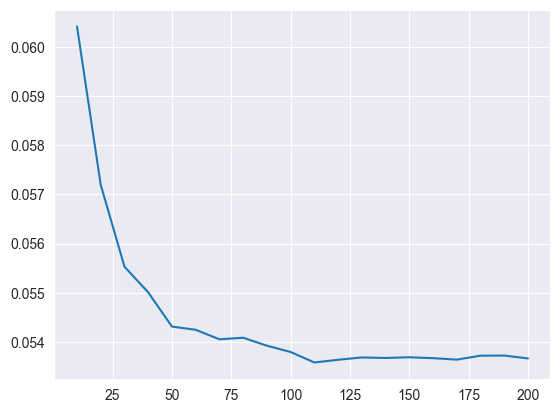

In [73]:
plt.plot(df_rmse_scores.n_estimators, df_rmse_scores.rmse)



## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`


What's the best `max_depth`:

* 10
* 15
* 20
* 25 ⭐

In [76]:
def rmse_random_forest(n_estimators, max_depth=None):
    rf = RandomForestRegressor(n_estimators=n_estimators,
                               random_state=1,
                               n_jobs=1,
                               max_depth=max_depth)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    return n_estimators, mean_squared_error(y_val, y_pred)

In [79]:
rmse_scores = []
for max_depth in [10, 5, 20, 25]:
    for n_estimators in range(10, 201, 10):
        _, rmse = rmse_random_forest(n_estimators=n_estimators, max_depth=max_depth)
        rmse_scores.append((max_depth, n_estimators, rmse))

df_rmse_scores = pd.DataFrame(rmse_scores, columns=['max_depth', 'n_estimators', 'rmse'])

,max_depth,n_estimators,rmse
79,25,200,0.053563
69,25,100,0.053594
60,25,10,0.060357
62,25,30,0.055379
63,25,40,0.054914
...,...,...,...
25,5,60,0.097722
24,5,50,0.098005
23,5,40,0.098068
22,5,30,0.097724


In [81]:
df_rmse_scores.sort_values(by='rmse', ascending=True)

,max_depth,n_estimators,rmse
70,25,110,0.053444
71,25,120,0.053456
73,25,140,0.053536
79,25,200,0.053563
76,25,170,0.053569
...,...,...,...
22,5,30,0.097724
21,5,20,0.097903
24,5,50,0.098005
23,5,40,0.098068




# Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split.
When doint it, we can calculate "gain" - the reduction in impurity before and after the split.
This gain is quite useful in understanding what are the imporatant features
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field.

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature?

* `total_rooms`
* `median_income`
* `total_bedrooms`
* `longitude`


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both gives same


## Submit the results

* Submit your results here: https://forms.gle/3yMSuQ4BeNuZFHTU8
* You can submit your solution multiple times. In this case, only the last submission will be used
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 17 October (Monday), 23:00 CEST.

After that, the form will be closed.